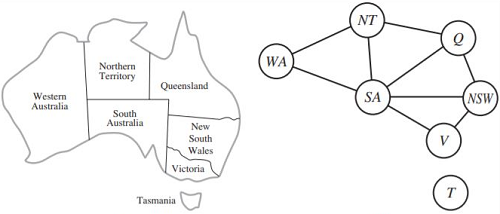

In [4]:
# Define a new cgraph
cgraph = {'WA': ['SA', 'NT'],
          'Q': ['SA', 'NT', 'NSW'],
          'T': [],
          'V': ['SA', 'NSW'],
          'SA': ['WA', 'NT', 'Q', 'NSW','V'],
          'NT': ['Q', 'WA', 'SA'],
          'NSW': ['Q', 'V', 'SA']}

remainingValues = {'WA': ['R','G','B'],
                    'Q': ['R','G','B'],
                    'T': ['R','G','B'],
                    'V':  ['R','G','B'],
                    'NT': ['R','G','B'],
                    'SA': ['R','G','B'],
                    'NSW': ['R','G','B']}

In [5]:
import random
def get_color(node, rv, cg):
    color = random.choice(rv[node])
    rv.pop(node)
    # update remaining values for neihbouring node
    adjList = cg[node]
    for adj in adjList:
        if adj in rv.keys() and color in rv[adj]:
            rv[adj].remove(color)
            if len(rv[adj])==0: # Forward Checking
              return 'rv empty'
    #print(adjList)
    return color

## 1) Highest Degree Node

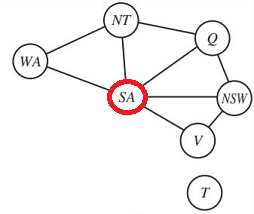

In [6]:
# write a method to get the highest degree node
def get_hdnode(cg, solved={}):
    mnode = ''
    degree = -1
    for k in cg.keys():
        if len(cg[k])  > degree and k not in solved.keys():
            #print(k)
            degree = len(cg[k])
            mnode = k
    return mnode

get_hdnode(cgraph,{'SA':'R','Q':'G'})

'NT'

Color the nodes using Highest degree heuristic

In [7]:
assigned = {}  # store assigned variables with colors
remainingValues = {
    'WA': ['R', 'G', 'B'],
    'Q': ['R', 'G', 'B'],
    'T': ['R', 'G', 'B'],
    'V': ['R', 'G', 'B'],
    'NT': ['R', 'G', 'B'],
    'SA': ['R', 'G', 'B'],
    'NSW': ['R', 'G', 'B']
}

for i in range(len(cgraph)):
    print('rv: ', end="")
    print(remainingValues)
    # assign color to the highest degree node
    selectedNode = get_hdnode(cgraph, assigned)
    print('Selected Node: ' + selectedNode)
    color = get_color(selectedNode, remainingValues, cgraph)

    # Check if 'rv empty' is returned
    if color == 'rv empty':
        print("Failure: No valid colors available for the node. Backtracking required.")
        break

    # Assign the selected color to the node
    assigned[selectedNode] = color
    print('assigned: ', end="")
    print(assigned)

# Final results
if len(assigned) == len(cgraph):
    print("\nSuccessfully colored all nodes:")
    print(assigned)
else:
    print("\nGraph coloring incomplete.")


rv: {'WA': ['R', 'G', 'B'], 'Q': ['R', 'G', 'B'], 'T': ['R', 'G', 'B'], 'V': ['R', 'G', 'B'], 'NT': ['R', 'G', 'B'], 'SA': ['R', 'G', 'B'], 'NSW': ['R', 'G', 'B']}
Selected Node: SA
assigned: {'SA': 'G'}
rv: {'WA': ['R', 'B'], 'Q': ['R', 'B'], 'T': ['R', 'G', 'B'], 'V': ['R', 'B'], 'NT': ['R', 'B'], 'NSW': ['R', 'B']}
Selected Node: Q
assigned: {'SA': 'G', 'Q': 'R'}
rv: {'WA': ['R', 'B'], 'T': ['R', 'G', 'B'], 'V': ['R', 'B'], 'NT': ['B'], 'NSW': ['B']}
Selected Node: NT
assigned: {'SA': 'G', 'Q': 'R', 'NT': 'B'}
rv: {'WA': ['R'], 'T': ['R', 'G', 'B'], 'V': ['R', 'B'], 'NSW': ['B']}
Selected Node: NSW
assigned: {'SA': 'G', 'Q': 'R', 'NT': 'B', 'NSW': 'B'}
rv: {'WA': ['R'], 'T': ['R', 'G', 'B'], 'V': ['R']}
Selected Node: WA
assigned: {'SA': 'G', 'Q': 'R', 'NT': 'B', 'NSW': 'B', 'WA': 'R'}
rv: {'T': ['R', 'G', 'B'], 'V': ['R']}
Selected Node: V
assigned: {'SA': 'G', 'Q': 'R', 'NT': 'B', 'NSW': 'B', 'WA': 'R', 'V': 'R'}
rv: {'T': ['R', 'G', 'B']}
Selected Node: T
assigned: {'SA': 'G', 'Q

In [8]:
remainingValues.keys()

dict_keys([])

## 2) Minimum Remaining Value

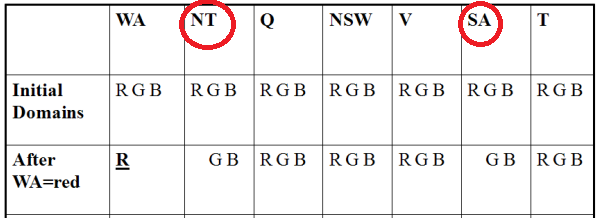

In [9]:
def get_MRVnode(rv, solved):
    min_values = float('inf')  # Start with infinity for comparison
    node = None  # To store the node with the minimum remaining values

    for k in rv.keys():
        if k not in solved.keys() and len(rv[k]) < min_values:
            min_values = len(rv[k])
            node = k

    return node

Color the nodes using MRV heuristic

In [10]:
assigned = {}

remainingValues = {
    'WA': ['R', 'G', 'B'],
    'Q': ['R', 'G', 'B'],
    'T': ['R', 'G', 'B'],
    'V': ['R', 'G', 'B'],
    'NT': ['R', 'G', 'B'],
    'SA': ['R', 'G', 'B'],
    'NSW': ['R', 'G', 'B']
}

for i in range(len(cgraph)):
    print("Remaining Values: ", remainingValues)
    # Select the node with Minimum Remaining Values (MRV)
    selectedNode = get_MRVnode(remainingValues, assigned)
    print(f"Selected Node (MRV): {selectedNode}")

    # Assign a color to the selected node
    color = get_color(selectedNode, remainingValues, cgraph)

    # Check if 'rv empty' is returned
    if color == 'rv empty':
        print("Failure: No valid colors available for the node. Backtracking required.")
        break

    # Assign the selected color to the node
    assigned[selectedNode] = color
    print("Assigned Colors: ", assigned)

# Final results
if len(assigned) == len(cgraph):
    print("\nSuccessfully colored all nodes:")
    print(assigned)
else:
    print("\nGraph coloring incomplete.")

Remaining Values:  {'WA': ['R', 'G', 'B'], 'Q': ['R', 'G', 'B'], 'T': ['R', 'G', 'B'], 'V': ['R', 'G', 'B'], 'NT': ['R', 'G', 'B'], 'SA': ['R', 'G', 'B'], 'NSW': ['R', 'G', 'B']}
Selected Node (MRV): WA
Assigned Colors:  {'WA': 'B'}
Remaining Values:  {'Q': ['R', 'G', 'B'], 'T': ['R', 'G', 'B'], 'V': ['R', 'G', 'B'], 'NT': ['R', 'G'], 'SA': ['R', 'G'], 'NSW': ['R', 'G', 'B']}
Selected Node (MRV): NT
Assigned Colors:  {'WA': 'B', 'NT': 'G'}
Remaining Values:  {'Q': ['R', 'B'], 'T': ['R', 'G', 'B'], 'V': ['R', 'G', 'B'], 'SA': ['R'], 'NSW': ['R', 'G', 'B']}
Selected Node (MRV): SA
Assigned Colors:  {'WA': 'B', 'NT': 'G', 'SA': 'R'}
Remaining Values:  {'Q': ['B'], 'T': ['R', 'G', 'B'], 'V': ['G', 'B'], 'NSW': ['G', 'B']}
Selected Node (MRV): Q
Assigned Colors:  {'WA': 'B', 'NT': 'G', 'SA': 'R', 'Q': 'B'}
Remaining Values:  {'T': ['R', 'G', 'B'], 'V': ['G', 'B'], 'NSW': ['G']}
Selected Node (MRV): NSW
Assigned Colors:  {'WA': 'B', 'NT': 'G', 'SA': 'R', 'Q': 'B', 'NSW': 'G'}
Remaining Value

**3) Select node randomly**

In [11]:
def get_RandomNode(rv):
    remaining_nodes = [k for k in rv.keys()]
    node = random.choice(remaining_nodes)
    return node

In [12]:
assigned = {}

remainingValues = {
    'WA': ['R', 'G', 'B'],
    'Q': ['R', 'G', 'B'],
    'T': ['R', 'G', 'B'],
    'V': ['R', 'G', 'B'],
    'NT': ['R', 'G', 'B'],
    'SA': ['R', 'G', 'B'],
    'NSW': ['R', 'G', 'B']
}

for i in range(len(cgraph)):
    print("Remaining Values: ", remainingValues)

    # Select a random node from the remaining values
    selectedNode = get_RandomNode(remainingValues)
    print("Selected Node: " + selectedNode)

    # Assign a color to the selected node
    color = get_color(selectedNode, remainingValues, cgraph)

    # Check if 'rv empty' is returned
    if color == 'rv empty':
        print("Failure: No valid colors available for the node. Backtracking required.")
        break

    # Assign the selected color to the node
    assigned[selectedNode] = color
    print("Assigned Colors: ", assigned)

# Final results
if len(assigned) == len(cgraph):
    print("\nSuccessfully colored all nodes:")
    print(assigned)
else:
    print("\nGraph coloring incomplete.")

Remaining Values:  {'WA': ['R', 'G', 'B'], 'Q': ['R', 'G', 'B'], 'T': ['R', 'G', 'B'], 'V': ['R', 'G', 'B'], 'NT': ['R', 'G', 'B'], 'SA': ['R', 'G', 'B'], 'NSW': ['R', 'G', 'B']}
Selected Node: V
Assigned Colors:  {'V': 'G'}
Remaining Values:  {'WA': ['R', 'G', 'B'], 'Q': ['R', 'G', 'B'], 'T': ['R', 'G', 'B'], 'NT': ['R', 'G', 'B'], 'SA': ['R', 'B'], 'NSW': ['R', 'B']}
Selected Node: SA
Assigned Colors:  {'V': 'G', 'SA': 'B'}
Remaining Values:  {'WA': ['R', 'G'], 'Q': ['R', 'G'], 'T': ['R', 'G', 'B'], 'NT': ['R', 'G'], 'NSW': ['R']}
Selected Node: NSW
Assigned Colors:  {'V': 'G', 'SA': 'B', 'NSW': 'R'}
Remaining Values:  {'WA': ['R', 'G'], 'Q': ['G'], 'T': ['R', 'G', 'B'], 'NT': ['R', 'G']}
Selected Node: Q
Assigned Colors:  {'V': 'G', 'SA': 'B', 'NSW': 'R', 'Q': 'G'}
Remaining Values:  {'WA': ['R', 'G'], 'T': ['R', 'G', 'B'], 'NT': ['R']}
Selected Node: WA
Failure: No valid colors available for the node. Backtracking required.

Graph coloring incomplete.


**Exercise**

Insert a new map here and show simulation using highest degree heuristic.

In [13]:
# Define a new map (graph structure)
new_map = {
    'A': ['B', 'C', 'D'],
    'B': ['A', 'C', 'E'],
    'C': ['A', 'B', 'D', 'E'],
    'D': ['A', 'C'],
    'E': ['B', 'C']
}

# Define initial remaining values (domain of colors)
remainingValues = {
    'A': ['R', 'G', 'B'],
    'B': ['R', 'G', 'B'],
    'C': ['R', 'G', 'B'],
    'D': ['R', 'G', 'B'],
    'E': ['R', 'G', 'B']
}

In [14]:
# Define the get_hdnode function (Highest Degree Heuristic)
def get_hdnode(cg, solved):
    mnode = ''
    degree = -1
    for k in cg.keys():
        if len(cg[k]) > degree and k not in solved.keys():
            degree = len(cg[k])
            mnode = k
    return mnode

# Define the get_color function
def get_color(node, rv, cg):
    color = random.choice(rv[node])
    rv.pop(node)
    # Update remaining values for neighboring nodes
    adjList = cg[node]
    for adj in adjList:
        if adj in rv.keys() and color in rv[adj]:
            rv[adj].remove(color)
            if len(rv[adj]) == 0:  # Forward Checking
                return 'rv empty'
    return color

# Initialize the assigned dictionary
assigned = {}

# Perform graph coloring using the Highest Degree Heuristic
for i in range(len(new_map)):
    print("Remaining Values: ", remainingValues)

    # Select the node with the highest degree
    selectedNode = get_hdnode(new_map, assigned)
    print("Selected Node (Highest Degree):", selectedNode)

    # Assign a color to the selected node
    color = get_color(selectedNode, remainingValues, new_map)

    # Check if 'rv empty' is returned
    if color == 'rv empty':
        print("Failure: No valid colors available for the node. Backtracking required.")
        break

    # Assign the selected color to the node
    assigned[selectedNode] = color
    print("Assigned Colors: ", assigned)

# Final results
if len(assigned) == len(new_map):
    print("\nSuccessfully colored all nodes:")
    print(assigned)
else:
    print("\nGraph coloring incomplete.")

Remaining Values:  {'A': ['R', 'G', 'B'], 'B': ['R', 'G', 'B'], 'C': ['R', 'G', 'B'], 'D': ['R', 'G', 'B'], 'E': ['R', 'G', 'B']}
Selected Node (Highest Degree): C
Assigned Colors:  {'C': 'B'}
Remaining Values:  {'A': ['R', 'G'], 'B': ['R', 'G'], 'D': ['R', 'G'], 'E': ['R', 'G']}
Selected Node (Highest Degree): A
Assigned Colors:  {'C': 'B', 'A': 'R'}
Remaining Values:  {'B': ['G'], 'D': ['G'], 'E': ['R', 'G']}
Selected Node (Highest Degree): B
Assigned Colors:  {'C': 'B', 'A': 'R', 'B': 'G'}
Remaining Values:  {'D': ['G'], 'E': ['R']}
Selected Node (Highest Degree): D
Assigned Colors:  {'C': 'B', 'A': 'R', 'B': 'G', 'D': 'G'}
Remaining Values:  {'E': ['R']}
Selected Node (Highest Degree): E
Assigned Colors:  {'C': 'B', 'A': 'R', 'B': 'G', 'D': 'G', 'E': 'R'}

Successfully colored all nodes:
{'C': 'B', 'A': 'R', 'B': 'G', 'D': 'G', 'E': 'R'}
